In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import kagglehub

/home/jefferyfan/ainotebook/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()

True

In [3]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# Dataset setup helper
def get_mnist_dataloaders(batch_size=128):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    
    train_dataset = torchvision.datasets.MNIST(
        root='./data', train=True, download=True, transform=transform
    )
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    return train_loader

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataloader = get_mnist_dataloaders(batch_size=1280)

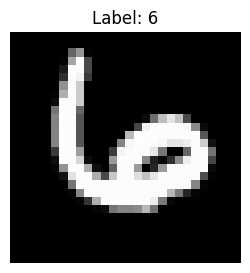

In [5]:
# Get a batch of images
images, labels = next(iter(dataloader))

# Select the first image and label
sample_image = images[0].squeeze()
sample_label = labels[0].item()

# Display the image
plt.figure(figsize=(3,3))
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {sample_label}')
plt.axis('off')
plt.show()

# TL;DR Diffusion Model

- If we add steady amount of Gaussian noise repeated, eventually it will be corrupted into indistinguishable from a random Gaussian Sample
- Diffusion model learns to reverse the procedure